In [3]:
import pandas as pd
import numpy as np
from skimage.io import imread,imshow,imsave,imread_collection
from skimage.color import rgb2gray
import Functions as fc
import os
from skimage.filters.rank import mean
import matplotlib.pyplot as plt
import cv2
from glob import glob
from IPython.display import clear_output
import time
from skimage.feature import greycomatrix, greycoprops
import seaborn as sns
from imagem import Imagem
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import accuracy_score as acc

In [2]:
baseDeDados = './imagens/*/'

In [3]:
flowers = fc.caminhos_dataset(baseDeDados)

In [4]:
valores = [(7,1.0), (75,1.5), (77,2.0), (88,3.0)]

In [5]:
""" for valor in valores:
    for flower in flowers:
        flowerCaminho = flower.replace(baseDeDados,"")  
        nomePasta1 = 'alargamento'+str(valor[0])+str(int(valor[1]))
        nomePasta2 = 'otsu'+'A'+str(valor[0])+str(int(valor[1]))
        # print(flowerCaminho)
        # print(nomePasta)
        caminho1,nomeFlower = fc.montaPasta(nomePasta1,flowerCaminho)
        caminho2, _ = fc.montaPasta(nomePasta2,flowerCaminho)
        if os.path.isdir(caminho1):
            imagem = fc.aplicaAlargamento(baseDeDados+flowerCaminho,valor[0],valor[1])
            imagem_otsu = fc.aplicaOtsu(imagem)
            plt.imsave(caminho1+nomeFlower,imagem,cmap=plt.cm.gray)
            plt.imsave(caminho2+nomeFlower,imagem_otsu,cmap=plt.cm.gray)
        else:
            os.makedirs(caminho1)
            os.makedirs(caminho2)
            imagem = fc.aplicaAlargamento(baseDeDados+flowerCaminho,valor[0],valor[1])
            plt.imsave(caminho1+nomeFlower,imagem,cmap=plt.cm.gray)
            plt.imsave(caminho2+nomeFlower,imagem_otsu,cmap=plt.cm.gray) """

' for valor in valores:\n    for flower in flowers:\n        flowerCaminho = flower.replace(baseDeDados,"")  \n        nomePasta1 = \'alargamento\'+str(valor[0])+str(int(valor[1]))\n        nomePasta2 = \'otsu\'+\'A\'+str(valor[0])+str(int(valor[1]))\n        # print(flowerCaminho)\n        # print(nomePasta)\n        caminho1,nomeFlower = fc.montaPasta(nomePasta1,flowerCaminho)\n        caminho2, _ = fc.montaPasta(nomePasta2,flowerCaminho)\n        if os.path.isdir(caminho1):\n            imagem = fc.aplicaAlargamento(baseDeDados+flowerCaminho,valor[0],valor[1])\n            imagem_otsu = fc.aplicaOtsu(imagem)\n            plt.imsave(caminho1+nomeFlower,imagem,cmap=plt.cm.gray)\n            plt.imsave(caminho2+nomeFlower,imagem_otsu,cmap=plt.cm.gray)\n        else:\n            os.makedirs(caminho1)\n            os.makedirs(caminho2)\n            imagem = fc.aplicaAlargamento(baseDeDados+flowerCaminho,valor[0],valor[1])\n            plt.imsave(caminho1+nomeFlower,imagem,cmap=plt.cm.gr

In [6]:
imgs = {
    'daisy': sorted(glob(f'./imagens/daisy/*', recursive=True)),
    'dandelion': sorted(glob(f'./imagens/dandelion/*', recursive=True)),
    'rose': sorted(glob(f'./imagens/rose/*', recursive=True)),
    'sunflower': sorted(glob(f'./imagens/sunflower/*', recursive=True)),
    'tulip': sorted(glob(f'./imagens/tulip/*', recursive=True))
}

In [7]:
labels = []
labelsInt = []
k = 0
for j in ['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']:
    for i in range(len(imgs['daisy'])):
        labels.append(j)
        labelsInt.append(k)
    k += 1

In [8]:
labels, labelsInt

(['daisy',
  'daisy',
  'daisy',
  'daisy',
  'daisy',
  'daisy',
  'daisy',
  'daisy',
  'daisy',
  'daisy',
  'daisy',
  'daisy',
  'daisy',
  'daisy',
  'daisy',
  'daisy',
  'daisy',
  'daisy',
  'daisy',
  'daisy',
  'daisy',
  'daisy',
  'daisy',
  'daisy',
  'daisy',
  'daisy',
  'daisy',
  'daisy',
  'daisy',
  'daisy',
  'daisy',
  'daisy',
  'daisy',
  'daisy',
  'daisy',
  'daisy',
  'daisy',
  'daisy',
  'daisy',
  'daisy',
  'daisy',
  'daisy',
  'daisy',
  'daisy',
  'daisy',
  'daisy',
  'daisy',
  'daisy',
  'daisy',
  'daisy',
  'daisy',
  'daisy',
  'daisy',
  'daisy',
  'daisy',
  'daisy',
  'daisy',
  'daisy',
  'daisy',
  'daisy',
  'daisy',
  'daisy',
  'daisy',
  'daisy',
  'daisy',
  'daisy',
  'daisy',
  'daisy',
  'daisy',
  'daisy',
  'daisy',
  'daisy',
  'daisy',
  'daisy',
  'daisy',
  'daisy',
  'daisy',
  'daisy',
  'daisy',
  'daisy',
  'daisy',
  'daisy',
  'daisy',
  'daisy',
  'daisy',
  'daisy',
  'daisy',
  'daisy',
  'daisy',
  'daisy',
  'daisy',

In [9]:
def aplicaGLCM(images, labels):
    features = np.zeros((len(labels),18)) #6 features x 3 color channels
    start = time.time()
    d = 5
    for id_im,imagem in enumerate(images):
        clear_output(wait=True)
        print('Extraindo atributos: {} imagens processadas de {}.'.format(id_im+1,len(images)))
        for id_ch in range(3):
            matrix0 = greycomatrix(imagem[:,:,id_ch], [d], [0],normed=True)
            matrix1 = greycomatrix(imagem[:,:,id_ch], [d], [np.pi/4],normed=True)
            matrix2 = greycomatrix(imagem[:,:,id_ch], [d], [np.pi/2],normed=True)
            matrix3 = greycomatrix(imagem[:,:,id_ch], [d], [3*np.pi/4],normed=True)
            matrix = (matrix0+matrix1+matrix2+matrix3)/4 
            props = np.zeros((6))
            props[0] = greycoprops(matrix,'contrast')
            props[1] = greycoprops(matrix,'dissimilarity')
            props[2] = greycoprops(matrix,'homogeneity')
            props[3] = greycoprops(matrix,'energy')
            props[4] = greycoprops(matrix,'correlation')
            props[5] = greycoprops(matrix,'ASM')
            features[id_im,id_ch*6:(id_ch+1)*6] = props

    end = time.time()
    tempo = end - start
    clear_output(wait=True)
    return features, tempo

In [4]:
originais = imread_collection(sorted(glob(f'./imagens/*/*', recursive=True)))
r1 = imread_collection(sorted(glob(f'./resultados/r1/otsuA71/*/*', recursive=True)))

In [ ]:
features, tempo = aplicaGLCM(r1,labels)

<AxesSubplot:>

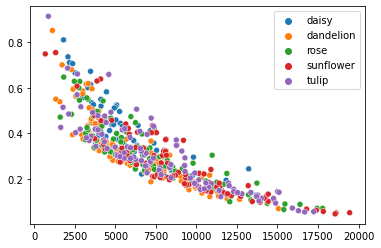

In [12]:
sns.scatterplot(x=features[:,0], y=features[:,5], hue=labels)

In [13]:
pca = PCA()
pca.fit(features)
transform = pca.transform(features)
print(np.sum(pca.explained_variance_ratio_[0:3]))

0.999999999919183


# Classification

- Dividir o espaço de atributos em regiões;
- A quantidade de regiões é o número de classes;
- A acurácia da classificação está diretamente liga à qualidade dos atributos.

### Split Data

In [14]:
train = 0.9
test = 1-train

In [15]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=test)

### Train/Test

In [16]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import cohen_kappa_score, make_scorer, confusion_matrix,accuracy_score
from sklearn.svm import SVC

In [17]:
c_rf = RandomForestClassifier()
c_rf.fit(X_train,y_train)
pred = c_rf.predict(X_test)
acc_rf = accuracy_score(y_test, pred)
print('Accuracy Random Forest: {}'.format(acc_rf))

Accuracy Random Forest: 0.32


In [18]:
def classificationForest(X,y, t=0.9):
    """ com random forest """
    # separar conjuntos de treino e teste
    X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=t,shuffle=True, random_state=42)
    # criar instancia do classificador
    clf = RandomForestClassifier()
    # treinar o classificador
    clf.fit(X_train,y_train)
    # realizar a predicao
    pred = clf.predict(X_test)
    # calcular o resultado utilizando a acuracia
    acuracia = acc(y_test,pred)
    return acuracia

In [19]:
def classificationXBR(X, y, t=0.9):
    X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=t,shuffle=True)
    # criar instancia do classificador
    clf = xgb.XGBClassifier()
    # treinar o classificador
    clf.fit(X_train,y_train)
    # realizar a predicao
    pred = clf.predict(X_test)
    # calcular o resultado utilizando a acuracia
    acuracia = acc(y_test,pred)
    return acuracia

In [20]:
classificationForest(features, labelsInt, 0.7)

0.24666666666666667

In [21]:
classificationXBR(features, labelsInt, 0.7)

0.28

In [26]:
classificationForest(features, labelsInt, 0.8)

0.24

In [24]:
classificationXBR(features, labelsInt, 0.8)

0.34

In [33]:
classificationForest(features, labelsInt, 0.9)

0.26

In [30]:
classificationXBR(features, labelsInt, 0.9)

0.3

'  \n    1 - Equalização do histograma na imagem colorida (em cada canal e depois soma)\n    2 - Aplica o filtro da mediana para remover o ruido\n    3 - Segmentação (otsu) no canal azul (pq é o mais escuro)\n    4 - Remover a mascara (etapa da background e foreground) remove o background\n'

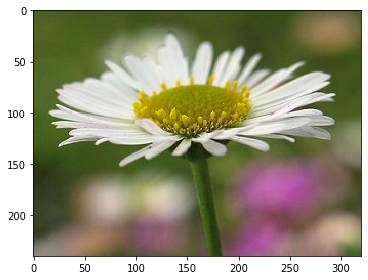

In [5]:
imshow(originais[0])
""" 
    Fazer a classificação do transformmm.
"""
"""  
    1 - Equalização do histograma na imagem colorida (em cada canal e depois soma)
    2 - Aplica o filtro da mediana para remover o ruido
    3 - Segmentação (otsu) no canal azul (pq é o mais escuro)
    4 - Remover a mascara (etapa da background e foreground) remove o background
"""

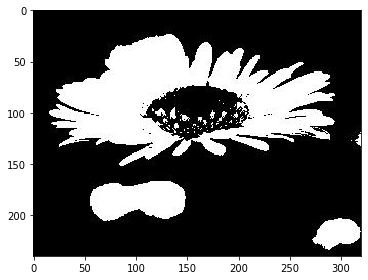

In [12]:
imshow(r1[0])

In [13]:
img0 = originais[0].copy()
img0 = img0/255
img0 = img0[:,:,0] + img0[:,:,1] + img0[:,:,2]

In [14]:
img1 = r1[0].copy()
img1 = img1/255
img1 = img1[:,:,0] + img1[:,:,1] + img1[:,:,2]

In [15]:
img0[~img1.astype(bool)] = 0

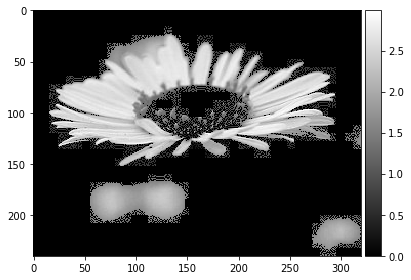

In [16]:
imshow(img0, cmap='gray')